# Data Preprocessing
## Library and dataset loading


In [1]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPreprocessing.R")
loadlibrary("RColorBrewer")
loadlibrary("dplyr")
loadlibrary("gridExtra")
loadlibrary("reshape")

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]

plot_size(4, 3)

## Sampling
Comparing random sampling with stratified sampling.


In [2]:
sampler <- sample.random(iris)
head(sampler$sample)

samples <- sample.stratified(iris, "Species")

tbl <- rbind(table(iris$Species), table(sampler$sample$Species), table(samples$sample$Species))
rownames(tbl) <- c("dataset", "random sample", "stratified sample")
head(tbl)

tbl <- tbl[1,]-tbl

tbl <- tbl[2:3,]

head(tbl)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
64,6.1,2.9,4.7,1.4,versicolor
120,6.0,2.2,5.0,1.5,virginica
147,6.3,2.5,5.0,1.9,virginica
118,7.7,3.8,6.7,2.2,virginica
66,6.7,3.1,4.4,1.4,versicolor
3,4.7,3.2,1.3,0.2,setosa


,setosa,versicolor,virginica
dataset,50,50,50
random sample,40,40,40
stratified sample,40,40,40


,setosa,versicolor,virginica
random sample,10,10,10
stratified sample,10,10,10


## Sampling data into folds
Sampling k-folds with random and stratified techniques. 


In [3]:
foldsr <- sample.random_kfold(iris, k=4)
foldss <- sample.stratified_kfold(iris, "Species", k=4)

tbls <- tblr <- NULL
for (i in (1:4)) {
    tblr <- rbind(tblr, table(foldsr[[i]]$Species))
}
rownames(tblr) <- rep("random sampling", 4)
head(tblr)

for (i in (1:4)) {
    tbls <- rbind(tbls, table(foldss[[i]]$Species))
}
rownames(tbls) <- rep("stratified sampling", 4)
head(tbls)


,setosa,versicolor,virginica
random sampling,17,6,14
random sampling,12,15,10
random sampling,10,14,14
random sampling,11,15,12


,setosa,versicolor,virginica
stratified sampling,13,13,13
stratified sampling,13,13,13
stratified sampling,12,12,12
stratified sampling,12,12,12


## Outlier analysis
Using box-plot an outlier is a value that is below than $Q_1 - 1.5 \cdot IQR$ or higher than $Q_3 + 1.5 \cdot IQR$ 

In [4]:
out <- outliers.boxplot(iris)
myiris <- iris[!out,]
head(iris[out,])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
16,5.7,4.4,1.5,0.4,setosa
33,5.2,4.1,1.5,0.1,setosa
34,5.5,4.2,1.4,0.2,setosa
61,5.0,2.0,3.5,1.0,versicolor


## Normalization

Normalization is a technique used to equal strength among variables. 

It is also important to apply it as an input for some machine learning methods. 

Min-Max: Adjust to 0 (minimum value) - 1 (maximum value).

Z-Score: Adjust to 0 (mean), 1 (variance).

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

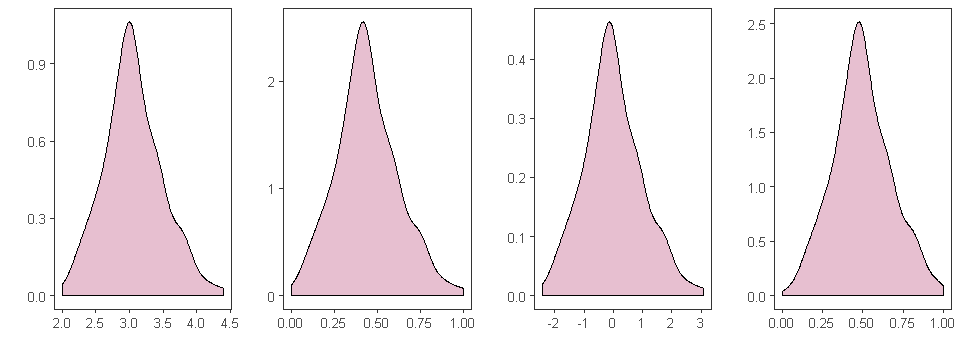

In [5]:
myirisM <- normalize.minmax(iris)

myirisZ <- normalize.zscore(iris)

myirisZS <- normalize.zscore(iris, nmean=0.5, nsd=0.5/2.698)


grfA <- plot.density(iris %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1]) 
grfB <- plot.density(myirisM$data %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1]) + xlim(0,1)
grfC <- plot.density(myirisZ$data %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1]) 
grfD <- plot.density(myirisZS$data %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1]) + xlim(0,1)

plot_size(8, 3)
grid.arrange(grfA, grfB, grfC, grfD, ncol=4)
plot_size(4, 3)

## PCA
PCA is a technique that finds a projection that captures the largest amount of variation in data.

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


PC1,PC2,Species
2.640270,-5.204041,setosa
2.670730,-4.666910,setosa
2.454606,-4.773636,setosa
2.545517,-4.648463,setosa
2.561228,-5.258629,setosa
2.975946,-5.707321,setosa


,PC1,PC2
Sepal.Length,0.5210659,-0.37741762
Sepal.Width,-0.2693474,-0.92329566
Petal.Length,0.5804131,-0.02449161
Petal.Width,0.5648565,-0.06694199


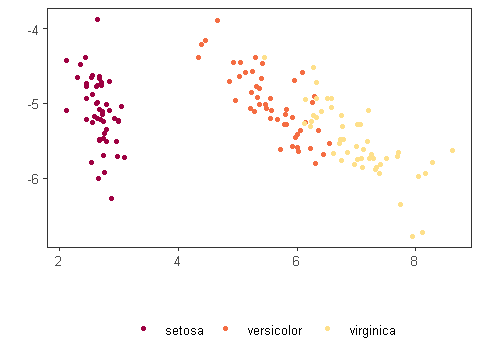

In [6]:
head(iris[,1:4])

mypca <- dt.pca(iris, "Species")
head(mypca$pca)

head(mypca$transf$pca.transf)

plot.scatter(mypca$pca %>% select(x=PC1, value=PC2, variable=Species), colors=mycolors[1:3])

## Discretization & smoothing
Discretization is the process of transferring continuous functions, models, variables, and equations into discrete counterparts. 

Smoothing is a technique that creates an approximating function that attempts to capture important patterns in the data while leaving out noise or other fine-scale structures/rapid phenomena.

An important part of the discretization/smoothing is to set up bins for proceeding the approximation.

In [7]:
bi <- binning.interval(iris$Sepal.Length, n=2)
bf <- binning.freq(iris$Sepal.Length, n=2)
bc <- binning.cluster(iris$Sepal.Length, n=2)

show_row(c('interval: ', sprintf("%.1f",bi$interval), 'entropy: ', sprintf("%.2f",entropy_group(bi$bins_factor, iris$Species))))
show_row(c('freq: ', sprintf("%.1f",bf$interval), 'entropy: ', sprintf("%.2f",entropy_group(bf$bins_factor, iris$Species))))
show_row(c('cluster: ', sprintf("%.1f",bc$interval), 'entropy: ', sprintf("%.2f",entropy_group(bc$bins_factor, iris$Species))))

interval:,4.3,6.1,7.9,entropy:,1.19


freq:,4.3,5.8,7.9,entropy:,1.10


cluster:,4.3,5.9,7.9,entropy:,1.10


## Optimizing the binning by frequency

In [8]:
bsl <- binning.opt(iris$Sepal.Length, binning=binning.freq)
bsw <- binning.opt(iris$Sepal.Width, binning=binning.freq)
bpl <- binning.opt(iris$Petal.Length, binning=binning.freq)
bpw <- binning.opt(iris$Petal.Width, binning=binning.freq)


show_row(c('Sepal.Length: ', sprintf("%.1f",bsl$interval), 'entropy: ', sprintf("%.2f",entropy_group(bsl$bins_factor, iris$Species))))
show_row(c('Sepal.Width: ', sprintf("%.1f",bsw$interval), 'entropy: ', sprintf("%.2f",entropy_group(bsw$bins_factor, iris$Species))))
show_row(c('Petal.Length: ', sprintf("%.1f",bpl$interval), 'entropy: ', sprintf("%.2f",entropy_group(bpl$bins_factor, iris$Species))))
show_row(c('Petal.Width: ', sprintf("%.1f",bpw$interval), 'entropy: ', sprintf("%.2f",entropy_group(bpw$bins_factor, iris$Species))))

Sepal.Length:,4.3,5.0,5.4,5.8,6.3,6.7,7.9,entropy:,0.87


Sepal.Width:,2.0,2.7,2.9,3.0,3.2,3.4,4.4,entropy:,1.19


Petal.Length:,1.0,1.5,3.9,4.6,5.3,6.9,entropy:,0.39


Petal.Width:,0.1,0.2,1.2,1.5,1.9,2.5,entropy:,0.38


## Optimizing the binning by cluster

In [9]:
bsl <- binning.opt(iris$Sepal.Length, binning=binning.cluster)
bsw <- binning.opt(iris$Sepal.Width, binning=binning.cluster)
bpl <- binning.opt(iris$Petal.Length, binning=binning.cluster)
bpw <- binning.opt(iris$Petal.Width, binning=binning.cluster)


show_row(c('Sepal.Length: ', sprintf("%.1f",bsl$interval), 'entropy: ', sprintf("%.2f",entropy_group(bsl$bins_factor, iris$Species))))
show_row(c('Sepal.Width: ', sprintf("%.1f",bsw$interval), 'entropy: ', sprintf("%.2f",entropy_group(bsw$bins_factor, iris$Species))))
show_row(c('Petal.Length: ', sprintf("%.1f",bpl$interval), 'entropy: ', sprintf("%.2f",entropy_group(bpl$bins_factor, iris$Species))))
show_row(c('Petal.Width: ', sprintf("%.1f",bpw$interval), 'entropy: ', sprintf("%.2f",entropy_group(bpw$bins_factor, iris$Species))))

Sepal.Length:,4.3,4.8,5.3,5.8,6.3,7.0,7.9,entropy:,0.86


Sepal.Width:,2.0,2.4,2.8,3.1,3.5,4.0,4.4,entropy:,1.22


Petal.Length:,1.0,1.5,2.9,4.6,5.6,6.9,entropy:,0.27


Petal.Width:,0.1,0.8,1.5,1.9,2.2,2.5,entropy:,0.22


## Balancing datasets

The first line artificially unbalances the dataset. 

Oversampling and subsampling are used to correct the unbalanced dataset. 

In [10]:
#forçando um desbalançeamento
myiris <- iris[c(1:20,51:100, 110:120),]
myiris.bo <- balance.oversampling(myiris, "Species")
myiris.bs <- balance.subsampling(myiris, "Species")
tbl <- rbind(table(myiris$Species), table(myiris.bo$Species), table(myiris.bs$Species))
rownames(tbl) <- c('unbalanced', 'oversampling', 'subsampling')
head(tbl)

,setosa,versicolor,virginica
unbalanced,20,50,11
oversampling,50,50,50
subsampling,11,11,11


## Categorical mapping
A categorical attribute with $n$ distinct values is mapped into $n$ binary attributes. 

It is also possible to map into $n-1$ binary values, where the scenario where all binary attributes are equal to zero corresponds to the last categorical value not indicated in the attributes.  

In [11]:
mycm <- dt.categ_mapping(sampler$sample, "Species")
head(mycm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Speciessetosa,Speciesversicolor,Speciesvirginica
64,6.1,2.9,4.7,1.4,versicolor,0,1,0
120,6.0,2.2,5.0,1.5,virginica,0,0,1
147,6.3,2.5,5.0,1.9,virginica,0,0,1
118,7.7,3.8,6.7,2.2,virginica,0,0,1
66,6.7,3.1,4.4,1.4,versicolor,0,1,0
3,4.7,3.2,1.3,0.2,setosa,1,0,0
